In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-mrna-vaccine-degradation-41/sample_submission.csv
/kaggle/input/covid-19-mrna-vaccine-degradation-41/train.csv
/kaggle/input/covid-19-mrna-vaccine-degradation-41/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train = pd.read_csv('/kaggle/input/covid-19-mrna-vaccine-degradation-41/train.csv')
test = pd.read_csv('/kaggle/input/covid-19-mrna-vaccine-degradation-41/test.csv')

In [4]:
train['type'] = 'Train'
test['type'] = 'Test'
train = pd.concat([train,test])

In [5]:
train.head()

,id,id_seqpos,sequence,structure,predicted_loop_type,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,...,a4_structure,b4_predicted_loop_type,a4_predicted_loop_type,b5_sequence,a5_sequence,b5_structure,a5_structure,b5_predicted_loop_type,a5_predicted_loop_type,type
0,id_159f0ff46,id_159f0ff46_44,A,.,H,1.7786,0.1195,0.7346,0.0790,0.3680,...,),S,S,C,A,.,),I,S,Train
1,id_d73546f4e,id_d73546f4e_38,G,.,I,0.4397,0.1033,0.1630,0.0799,0.0878,...,.,S,H,C,C,.,.,B,H,Train
2,id_f3037fedf,id_f3037fedf_34,G,(,S,0.1120,0.1375,0.0000,0.0744,0.1835,...,(,S,S,A,G,(,(,S,S,Train
3,id_468300749,id_468300749_12,G,(,S,0.0622,0.0471,0.1179,0.1075,0.0657,...,(,E,S,A,U,.,(,E,S,Train
4,id_69e3878a2,id_69e3878a2_28,U,(,S,0.1378,0.1352,0.4069,0.2168,0.3375,...,(,S,S,G,G,(,.,S,H,Train


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163200 entries, 0 to 32639
Data columns (total 46 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      163200 non-null  object 
 1   id_seqpos               163200 non-null  object 
 2   sequence                163200 non-null  object 
 3   structure               163200 non-null  object 
 4   predicted_loop_type     163200 non-null  object 
 5   reactivity              130560 non-null  float64
 6   reactivity_error        163200 non-null  float64
 7   deg_Mg_pH10             130560 non-null  float64
 8   deg_error_Mg_pH10       163200 non-null  float64
 9   deg_pH10                163200 non-null  float64
 10  deg_error_pH10          163200 non-null  float64
 11  deg_Mg_50C              130560 non-null  float64
 12  deg_error_Mg_50C        163200 non-null  float64
 13  deg_50C                 163200 non-null  float64
 14  deg_error_50C        

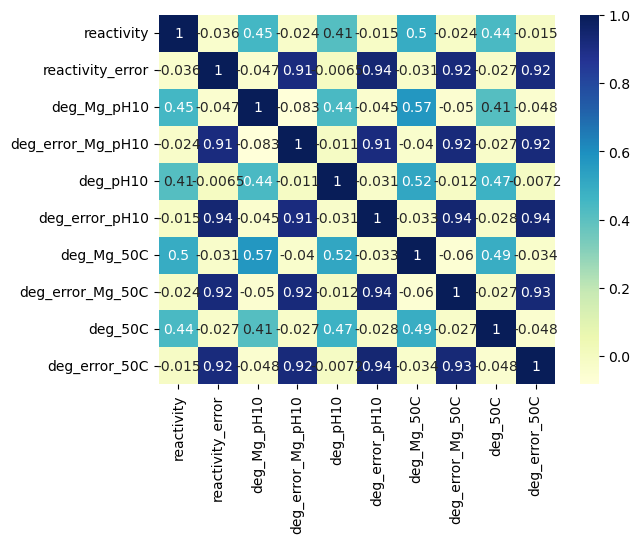

In [7]:
# plotting correlation heatmap
dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [8]:
train.drop(['deg_error_Mg_pH10'],axis=1,inplace=True)

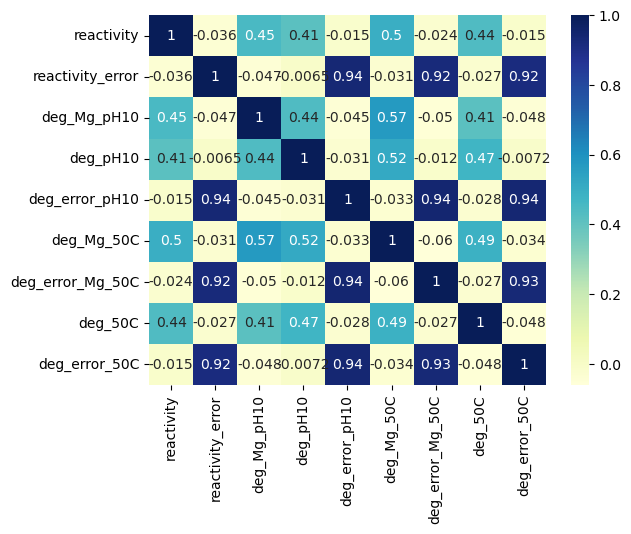

In [9]:
# plotting correlation heatmap
dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [10]:
train.drop(['deg_error_Mg_50C'],axis=1,inplace=True)

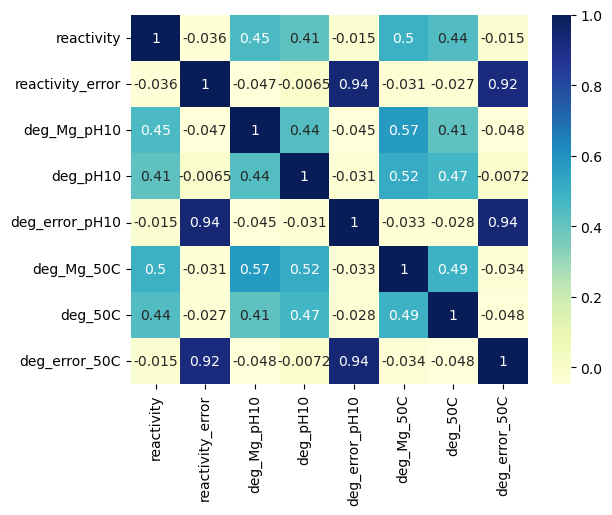

In [11]:
# plotting correlation heatmap
dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [12]:
train.drop(['reactivity_error'],axis=1,inplace=True)

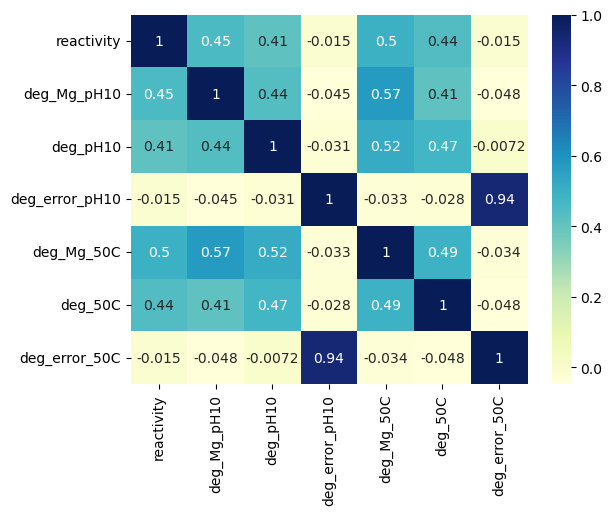

In [13]:
# plotting correlation heatmap
dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [14]:
train.drop(['deg_error_pH10'],axis=1,inplace=True)

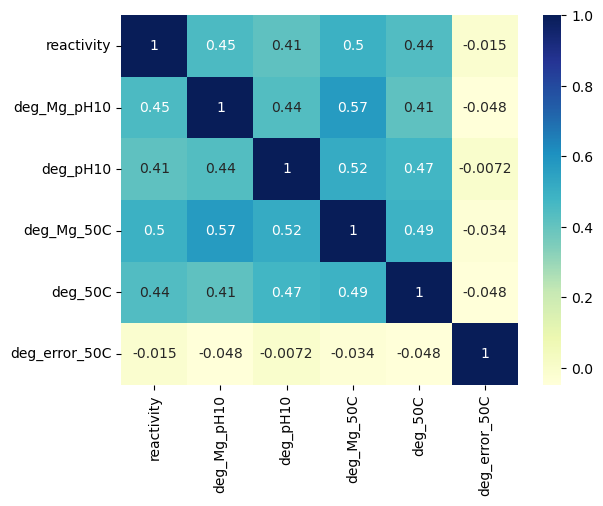

In [15]:
# plotting correlation heatmap
dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163200 entries, 0 to 32639
Data columns (total 42 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      163200 non-null  object 
 1   id_seqpos               163200 non-null  object 
 2   sequence                163200 non-null  object 
 3   structure               163200 non-null  object 
 4   predicted_loop_type     163200 non-null  object 
 5   reactivity              130560 non-null  float64
 6   deg_Mg_pH10             130560 non-null  float64
 7   deg_pH10                163200 non-null  float64
 8   deg_Mg_50C              130560 non-null  float64
 9   deg_50C                 163200 non-null  float64
 10  deg_error_50C           163200 non-null  float64
 11  b1_sequence             163200 non-null  object 
 12  a1_sequence             163200 non-null  object 
 13  b1_structure            163200 non-null  object 
 14  a1_structure         

In [17]:
test.head()

,id,id_seqpos,sequence,structure,predicted_loop_type,reactivity_error,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,deg_error_Mg_50C,...,a4_structure,b4_predicted_loop_type,a4_predicted_loop_type,b5_sequence,a5_sequence,b5_structure,a5_structure,b5_predicted_loop_type,a5_predicted_loop_type,type
0,id_001f94081,id_001f94081_0,G,.,E,0.1359,0.2613,2.3375,0.2631,0.1501,...,.,-1,E,-1,A,-1,(,-1,S,Test
1,id_001f94081,id_001f94081_4,A,.,E,0.1314,0.1798,0.2635,0.1000,0.1369,...,(,E,S,-1,C,-1,(,-1,S,Test
2,id_001f94081,id_001f94081_8,U,(,S,0.0756,0.1056,0.0530,0.0517,0.0705,...,.,E,H,A,U,.,.,E,H,Test
3,id_001f94081,id_001f94081_9,C,(,S,0.1087,0.1896,0.5348,0.1474,0.1588,...,.,S,H,A,A,.,.,E,H,Test
4,id_001f94081,id_001f94081_13,U,.,H,0.1388,0.1810,0.7699,0.1417,0.1382,...,.,S,H,U,G,(,),S,S,Test


In [18]:
pd.read_csv('/kaggle/input/covid-19-mrna-vaccine-degradation-41/sample_submission.csv').head()

,id_seqpos,reactivity,deg_Mg_pH10,deg_Mg_50C
0,id_001f94081_0,0.0,0.0,0.0
1,id_001f94081_4,0.0,0.0,0.0
2,id_001f94081_8,0.0,0.0,0.0
3,id_001f94081_9,0.0,0.0,0.0
4,id_001f94081_13,0.0,0.0,0.0


In [19]:
train.head()

,id,id_seqpos,sequence,structure,predicted_loop_type,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C,...,a4_structure,b4_predicted_loop_type,a4_predicted_loop_type,b5_sequence,a5_sequence,b5_structure,a5_structure,b5_predicted_loop_type,a5_predicted_loop_type,type
0,id_159f0ff46,id_159f0ff46_44,A,.,H,1.7786,0.7346,0.3680,0.7228,0.5685,...,),S,S,C,A,.,),I,S,Train
1,id_d73546f4e,id_d73546f4e_38,G,.,I,0.4397,0.1630,0.0878,0.1100,0.0666,...,.,S,H,C,C,.,.,B,H,Train
2,id_f3037fedf,id_f3037fedf_34,G,(,S,0.1120,0.0000,0.1835,0.0933,0.0000,...,(,S,S,A,G,(,(,S,S,Train
3,id_468300749,id_468300749_12,G,(,S,0.0622,0.1179,0.0657,0.0548,0.0749,...,(,E,S,A,U,.,(,E,S,Train
4,id_69e3878a2,id_69e3878a2_28,U,(,S,0.1378,0.4069,0.3375,0.2378,0.6247,...,(,S,S,G,G,(,.,S,H,Train


In [20]:
train.sequence.value_counts()

A    59695
G    43852
C    30908
U    28745
Name: sequence, dtype: int64

In [21]:
train.structure.value_counts()

.    83267
(    39982
)    39951
Name: structure, dtype: int64

In [22]:
train.replace('(',')',inplace=True)

In [23]:
train.predicted_loop_type.value_counts()

S    79933
E    35232
H    19032
I    12185
X     7959
M     5792
B     3067
Name: predicted_loop_type, dtype: int64

## May be deleted ^^^^^^^^^^^^^^
# ----------------------


In [24]:
train.b1_sequence.value_counts()

A     58341
G     43438
C     30298
U     28723
-1     2400
Name: b1_sequence, dtype: int64

In [31]:
train[train.b1_sequence != '-1'][['deg_pH10','deg_50C','a1_sequence','a2_sequence','b1_sequence','b2_sequence']]

,deg_pH10,deg_50C,a1_sequence,a2_sequence,b1_sequence,b2_sequence
0,0.3680,0.5685,U,C,C,G
1,0.0878,0.0666,A,C,G,C
2,0.1835,0.0000,G,G,U,U
3,0.0657,0.0749,G,C,C,G
4,0.3375,0.6247,A,C,G,C
...,...,...,...,...,...,...
32635,0.0140,0.0182,C,G,U,G
32636,0.0806,0.0237,C,A,U,G
32637,0.5538,0.4242,C,U,C,U
32638,0.1642,0.1120,G,C,U,C


In [64]:
train['Col_seq'] = train['a1_sequence'] + train['a2_sequence'] + train['b1_sequence']  + train['b2_sequence']

In [65]:
train.Col_seq.value_counts()

AAAA      4111
AAGG      3209
AGAA      2423
GA-1-1    2400
AAG-1     2400
          ... 
CUUU       161
CGUU       158
UUCU       143
UUCC       140
CCUU       131
Name: Col_seq, Length: 258, dtype: int64

In [68]:
(train['a1_sequence'] + train['b1_sequence']  + train['b2_sequence']).value_counts()

AAA    9553
AAG    7337
GAA    5520
AGG    5050
AGA    4865
       ... 
UUC    1130
CCC     991
UCC     872
UCU     825
CUU     706
Length: 66, dtype: int64

In [83]:
train[train['b2_sequence'] == '-1']

,id,id_seqpos,sequence,structure,predicted_loop_type,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C,...,b4_predicted_loop_type,a4_predicted_loop_type,b5_sequence,a5_sequence,b5_structure,a5_structure,b5_predicted_loop_type,a5_predicted_loop_type,type,Col_seq
34,id_3c50a5720,id_3c50a5720_0,G,.,E,0.6517,0.6647,1.8883,0.7583,0.5262,...,-1,E,-1,U,-1,.,-1,E,Train,GA-1-1
35,id_c0a766bfa,id_c0a766bfa_0,G,.,E,0.5273,0.5754,2.6389,0.3799,0.9282,...,-1,E,-1,U,-1,),-1,S,Train,GA-1-1
51,id_7e27b6416,id_7e27b6416_1,G,.,E,1.7899,2.8028,3.6979,2.8429,2.6369,...,-1,E,-1,A,-1,.,-1,E,Train,AAG-1
67,id_79f0b20a2,id_79f0b20a2_0,G,.,E,0.9997,0.6487,2.0066,0.7222,0.8409,...,-1,E,-1,A,-1,.,-1,E,Train,GA-1-1
100,id_8a8e1c7e6,id_8a8e1c7e6_1,G,.,E,1.3880,1.2957,2.8599,1.4767,1.5493,...,-1,S,-1,U,-1,),-1,S,Train,AAG-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32452,id_fe2edbdb0,id_fe2edbdb0_1,G,.,E,NaN,NaN,3.5022,NaN,1.2800,...,-1,E,-1,G,-1,.,-1,E,Test,AAG-1
32492,id_fe899d33d,id_fe899d33d_0,G,.,E,NaN,NaN,2.1362,NaN,0.6438,...,-1,E,-1,A,-1,.,-1,E,Test,GA-1-1
32566,id_ff84602f7,id_ff84602f7_1,G,.,E,NaN,NaN,3.3601,NaN,2.3736,...,-1,E,-1,U,-1,.,-1,E,Test,AAG-1
32585,id_ff85fcdba,id_ff85fcdba_0,G,.,E,NaN,NaN,2.8541,NaN,0.6526,...,-1,E,-1,A,-1,.,-1,E,Test,GA-1-1


In [85]:
(train['a2_sequence'] + train['b2_sequence']).value_counts()

AA     22702
AG     14183
GA     13928
GG     12931
CA     10557
UA     10070
AC      9538
AU      9219
CG      8864
GC      8078
UU      7900
CC      7691
UG      6967
GU      5948
CU      5271
A-1     4800
UC      4553
dtype: int64

In [88]:
dict((train['a1_sequence'] + train['b1_sequence']+train['a2_sequence']+train['b2_sequence']).value_counts())

{'AAAA': 4111,
 'AGAG': 3209,
 'AAGA': 2423,
 'G-1A-1': 2400,
 'AGA-1': 2400,
 'AAGG': 2329,
 'AAAG': 2167,
 'GAAA': 2049,
 'UAAA': 1959,
 'UUUU': 1942,
 'AGAA': 1730,
 'AAUU': 1726,
 'GGCC': 1680,
 'CCGG': 1654,
 'AACA': 1525,
 'AUAA': 1519,
 'AAUA': 1494,
 'AACG': 1472,
 'CAGA': 1421,
 'GGAA': 1412,
 'CAAA': 1405,
 'AAUG': 1369,
 'GACA': 1314,
 'ACAA': 1312,
 'AGGA': 1278,
 'AAAC': 1270,
 'AAAU': 1210,
 'UUAA': 1208,
 'UGAA': 1165,
 'GAAG': 1136,
 'GUAA': 1126,
 'GAGA': 1113,
 'AGAC': 1094,
 'AGUA': 1058,
 'GAUA': 1044,
 'ACAG': 1011,
 'GGCA': 985,
 'AAGC': 961,
 'CAAU': 958,
 'ACGA': 958,
 'CCAA': 929,
 'GCCG': 929,
 'CGGA': 926,
 'GAAU': 919,
 'AACC': 918,
 'CAGG': 905,
 'ACGG': 903,
 'ACCA': 868,
 'GUCA': 848,
 'AAGU': 846,
 'CAAC': 833,
 'GGAC': 818,
 'GCGG': 814,
 'UAAU': 808,
 'AGCA': 799,
 'CGGC': 799,
 'CAUA': 783,
 'AUGA': 779,
 'CGAA': 774,
 'GAAC': 771,
 'CAAG': 765,
 'GGGG': 756,
 'UCAA': 753,
 'AGCC': 746,
 'AGGG': 746,
 'CUGG': 741,
 'UAGA': 730,
 'AUUA': 722,
 'GCAG': 

In [152]:
b12_data = train[(train.b1_sequence != '-1') & (train.b2_sequence != '-1' )][['deg_pH10','deg_50C','a1_sequence','a2_sequence','b1_sequence','b2_sequence']]

In [153]:
b12_data['a2_sequence'] = b12_data.a2_sequence.map({'A':1,'G':2,'C':3,'U':4})

In [154]:
b12_data['a1_sequence'] = b12_data.a1_sequence.map({'A':1,'G':2,'C':3,'U':4})

In [155]:
b12_data.head()

,deg_pH10,deg_50C,a1_sequence,a2_sequence,b1_sequence,b2_sequence
0,0.3680,0.5685,4,3,C,G
1,0.0878,0.0666,1,3,G,C
2,0.1835,0.0000,2,2,U,U
3,0.0657,0.0749,2,3,C,G
4,0.3375,0.6247,1,3,G,C


In [161]:
# Downsampling function
# Downsample the input 'DataFrame' by balancing the class distribution.
def returnbalanceData(data,target,min_class):
    
    classes = dict(data[target].value_counts())
    data.reindex()
    index = np.array([])
    for clas in classes:
        class_index = data[data[target] == clas].index
        sample=list(np.random.choice(class_index,classes[min_class],replace=False))
        
        index = np.concatenate((sample,index))
    return data.iloc[index,:]
b12_data = returnbalanceData(b12_data,'b1_sequence','U')

IndexError: positional indexers are out-of-bounds

In [157]:
b12_data.b1_sequence.value_counts()

A    42104
G    29944
C    21975
U    20869
Name: b1_sequence, dtype: int64

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
X = b12_data.iloc[:,:-5].values
y = b12_data.iloc[:,-2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

accuracy = accuracy_score(y_test,pred)

# Calculate confusion matrix
conf_matrix1 = confusion_matrix(y_test, pred)
print("Confusion Matrix1:\n", conf_matrix1)

class_report1 = classification_report(y_test, pred)
print("Classification Report1:\n", class_report1)

Confusion Matrix1:
 [[11272  3737  2785  1520]
 [ 5125  2618  1535   712]
 [ 7166  3153  2125  1002]
 [ 5102  2264  1386   770]]
Classification Report1:
               precision    recall  f1-score   support

           A       0.39      0.58      0.47     19314
           C       0.22      0.26      0.24      9990
           G       0.27      0.16      0.20     13446
           U       0.19      0.08      0.11      9522

    accuracy                           0.32     52272
   macro avg       0.27      0.27      0.26     52272
weighted avg       0.29      0.32      0.29     52272



In [121]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=200) 
# You can adjust n_estimators and other hyperparameters

# Assuming you have X_train_pca, y_train, X_val_pca, y_val
# Train the Random Forest classifier
random_forest_classifier.fit(X_train, y_train)

pred = random_forest_classifier.predict(X_test)

accuracy = accuracy_score(y_test,pred)

# Calculate confusion matrix
conf_matrix1 = confusion_matrix(y_test, pred)
print("Confusion Matrix1:\n", conf_matrix1)

class_report1 = classification_report(y_test, pred)
print("Classification Report1:\n", class_report1)

Confusion Matrix1:
 [[9506 2152 5707 1949]
 [4166 1185 3750  889]
 [5825 1647 4716 1258]
 [4271 1086 3181  984]]
Classification Report1:
               precision    recall  f1-score   support

           A       0.40      0.49      0.44     19314
           C       0.20      0.12      0.15      9990
           G       0.27      0.35      0.31     13446
           U       0.19      0.10      0.13      9522

    accuracy                           0.31     52272
   macro avg       0.27      0.27      0.26     52272
weighted avg       0.29      0.31      0.29     52272



In [123]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(
                                                   random_state=14,
                                                )  # You can adjust random_state if needed

# Assuming you have X_train_pca, y_train, X_val_pca, y_val
# Train the Decision Tree classifier
decision_tree_classifier.fit(X_train, y_train)

pred = decision_tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test,pred)

# Calculate confusion matrix
conf_matrix1 = confusion_matrix(y_test, pred)
print("Confusion Matrix1:\n", conf_matrix1)

class_report1 = classification_report(y_test, pred)
print("Classification Report1:\n", class_report1)

Confusion Matrix1:
 [[10853  2058  5065  1338]
 [ 4824  1190  3364   612]
 [ 6693  1623  4244   886]
 [ 4904  1071  2846   701]]
Classification Report1:
               precision    recall  f1-score   support

           A       0.40      0.56      0.47     19314
           C       0.20      0.12      0.15      9990
           G       0.27      0.32      0.29     13446
           U       0.20      0.07      0.11      9522

    accuracy                           0.32     52272
   macro avg       0.27      0.27      0.25     52272
weighted avg       0.29      0.32      0.30     52272

